<a href="https://colab.research.google.com/github/shweedu23/Advanced-Machine-Learning/blob/master/Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import scipy.stats as sts
dist = sts.distributions

In [15]:
pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-li8nrkvl
  Running command git clone -q https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-li8nrkvl
  Created wheel for pymc3: filename=pymc3-3.8-cp36-none-any.whl size=40962356 sha256=fe8227524c2555e0d1c1af744ee6f288a2712f3c0e6f01dd2b77726b173e107a
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbtmt4u0/wheels/a1/e3/71/a696f2af0dd40bccc0ce672d616d21cc9dd90dbdd3f03242f4
Successfully built pymc3


QUESTION 1

In [0]:
def cos(x):
  return np.cos(x*np.pi *2)

QUESTION 2

In [0]:
x = np.linspace(0,1,10)
y = cos(x)
e = dist.norm(0,12).rvs(10)
y_obs = cos(x) + e

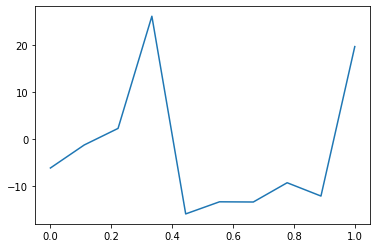

In [18]:
plt.plot(x,y_obs)
plt.show()

QUESTION 3

In [0]:
p_1 = np.poly1d(np.polyfit(x,y_obs,deg=1))
p_2 = np.poly1d(np.polyfit(x,y_obs,deg=2))
p_3 = np.poly1d(np.polyfit(x,y_obs,deg=3))
p_4 = np.poly1d(np.polyfit(x,y_obs,deg=4))
p_5 = np.poly1d(np.polyfit(x,y_obs,deg=5))
p_6 = np.poly1d(np.polyfit(x,y_obs,deg=6))
p_7 = np.poly1d(np.polyfit(x,y_obs,deg=7))
p_8 = np.poly1d(np.polyfit(x,y_obs,deg=8))
p_9 = np.poly1d(np.polyfit(x,y_obs,deg=9))

QUESTION 4

Text(0.5, 1.0, 'P_9')

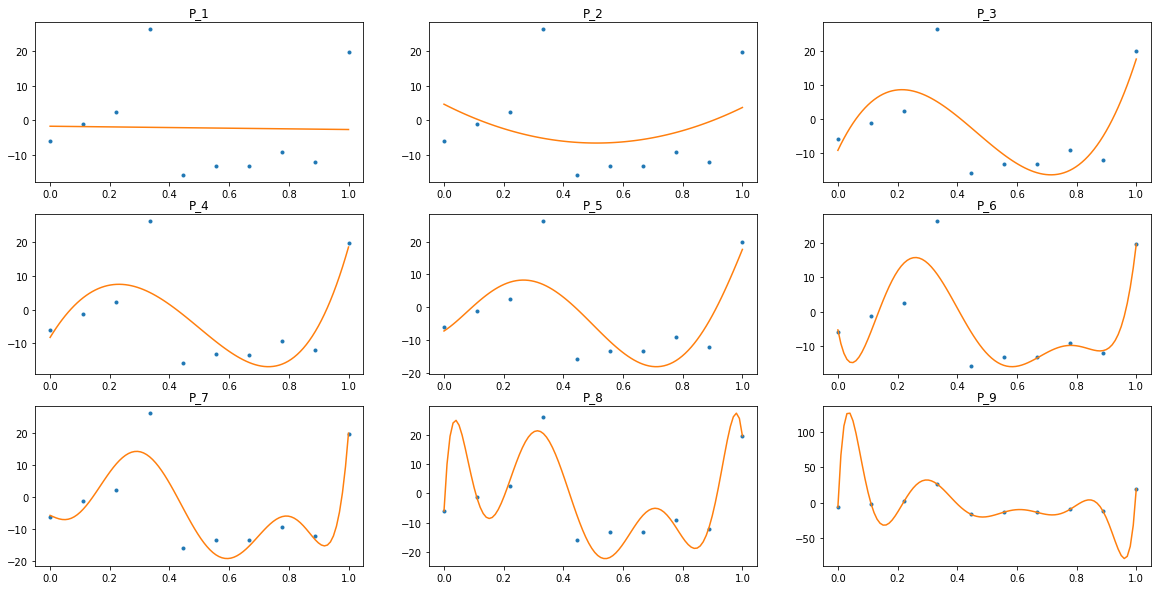

In [20]:
new_x = np.linspace(0,1, 100)


_,axi = plt.subplots(3,3, figsize =(20,10))
axi[0][0].plot(x,y_obs,'.',new_x,p_1(new_x))
axi[0][0].set_title('P_1')
axi[0][1].plot(x,y_obs,'.',new_x,p_2(new_x))
axi[0][1].set_title('P_2')
axi[0][2].plot(x,y_obs,'.',new_x,p_3(new_x))
axi[0][2].set_title('P_3')
axi[1][0].plot(x,y_obs,'.',new_x,p_4(new_x))
axi[1][0].set_title('P_4')
axi[1][1].plot(x,y_obs,'.',new_x,p_5(new_x))
axi[1][1].set_title('P_5')
axi[1][2].plot(x,y_obs,'.',new_x,p_6(new_x))
axi[1][2].set_title('P_6')
axi[2][0].plot(x,y_obs,'.',new_x,p_7(new_x))
axi[2][0].set_title('P_7')
axi[2][1].plot(x,y_obs,'.',new_x,p_8(new_x))
axi[2][1].set_title('P_8')
axi[2][2].plot(x,y_obs,'.',new_x,p_9(new_x))
axi[2][2].set_title('P_9')

QUESTION 5

In [0]:
from prettytable import PrettyTable

table = PrettyTable(['W_1','W_2','W_3','W_4','W_5','W_6','W_7','W_8','W_9'])

for x in range (0,10):
  table.add_row([p_1[x],p_2[x],p_3[x],p_4[x],p_5[x],p_6[x],p_7[x],p_8[x],p_9[x]])

In [22]:
print(table)

+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|         W_1         |        W_2         |        W_3         |        W_4         |         W_5         |         W_6         |         W_7         |         W_8         |         W_9         |
+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| -1.7870597620504751 | 4.591326878792193  | -9.297868344141573 | -8.237269585702963 |  -7.285146962400066 |  -5.338083338201223 |  -5.728429693320419 |  -6.008249334786399 |  -6.077226078519259 |
| -0.9494203606954659 | -44.0035301863835  | 184.67214830548886 | 144.89969486404993 |  58.16132388116383  |  -461.4126042352028 |   -39.283691246684  |  1963.2935439945993 |  9164.098224039144  |
|          0   

From the above table it can be observed that the number of weights increases as the degree of polynomial increases.

QUESTION 6

In [23]:


from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y, y_obs))

print(rmse)

13.842709466817297


QUESTION 7

In [24]:
with pm.Model() as model_poly:

  #priors
  w_0 = pm.Normal('Intercepts',mu = 0,sigma=10,shape = 1)
  w = pm.Normal('weights',mu=0,sigma=10,shape=4)
  sigma = pm.HalfCauchy('sigma',10)

  #mean

  mu =pm.Deterministic('mu',w_0 + w[1]*cos(x) + w[2]*cos(x)**2 + w[3]*cos(x)**3)
    #likelihood
  y_obs = pm.Normal('y_obs',mu=mu,sigma=sigma,observed=y_obs)
  trace = pm.sample(2000, tune=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, weights, Intercepts]


There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [25]:
!pip install arviz 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62abdb77f0>,
      dtype=object)

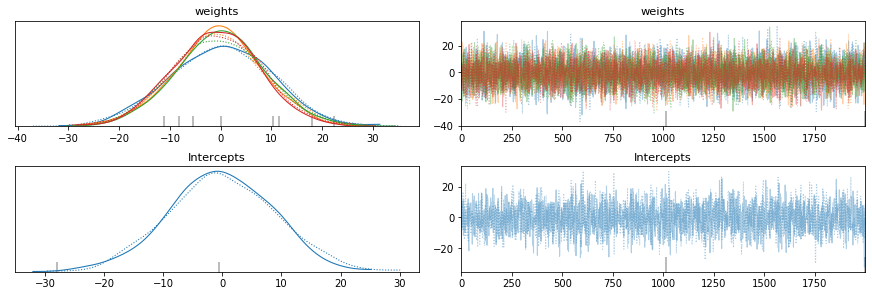

In [26]:
pm.traceplot(trace,var_names=['weights','Intercepts'])